In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
train_directory='train'
test_directory='test'
val_directory='valid'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 7s 0us/step


In [7]:
 # useful for getting number of classes
folders = glob('train/*')
len(folders)

500

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80085 images belonging to 500 classes.
Found 2500 images belonging to 500 classes.


In [12]:
print(len(training_set))
print(len(test_set))

2503
79


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
2503/2503 [==============================] - 11018s 4s/step - loss: 6.3485 - accuracy: 0.3199 - val_loss: 3.5794 - val_accuracy: 0.5844
Epoch 2/5
2503/2503 [==============================] - 11523s 5s/step - loss: 4.1089 - accuracy: 0.5525 - val_loss: 3.2948 - val_accuracy: 0.6384
Epoch 3/5
2503/2503 [==============================] - 11050s 4s/step - loss: 3.3707 - accuracy: 0.6344 - val_loss: 3.0548 - val_accuracy: 0.6888
Epoch 4/5
2503/2503 [==============================] - 10913s 4s/step - loss: 2.8925 - accuracy: 0.6887 - val_loss: 3.2548 - val_accuracy: 0.6920
Epoch 5/5
2503/2503 [==============================] - 10742s 4s/step - loss: 2.5185 - accuracy: 0.7314 - val_loss: 3.5367 - val_accuracy: 0.7072


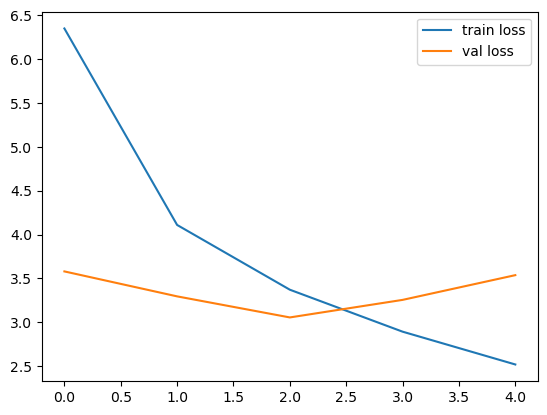

In [14]:
import matplotlib.pyplot as plt
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

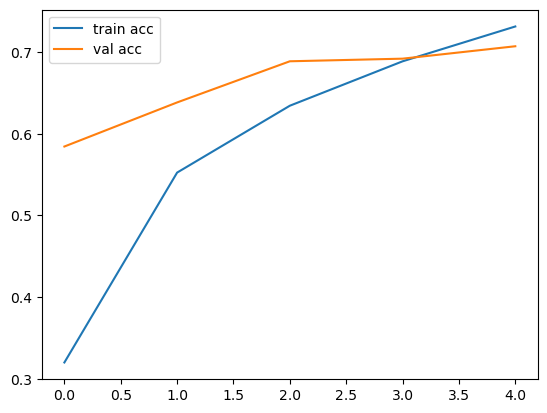

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
model.save('BC.h5')

In [29]:
#from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
#tensorflow.keras.utils.image_dataset_from_directory
#from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [23]:
!pip install tensorflow keras --upgrade

In [30]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [31]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 4s 4s/step


'BARN OWL'

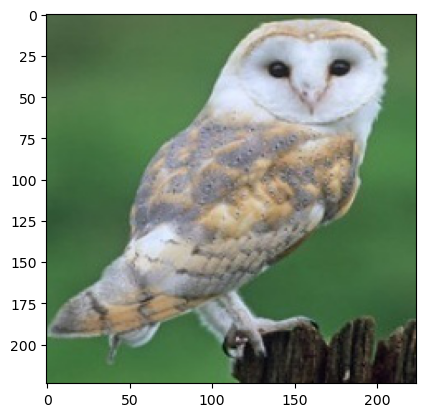

In [32]:
img='valid/BARN OWL/1.jpg'
pic=load_img('valid/BARN OWL/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [40]:
%%writefile Bird_Classification.py 
import streamlit as st
from PIL import Image
#from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from keras.models import load_model
#from keras_preprocessing.image import load_img
from tensorflow.keras.utils import load_img,img_to_array

model = load_model('BC.h5',compile=False)
lab = {0: 'AFRICAN CROWNED CRANE', 1: 'AFRICAN FIREFINCH', 2: 'ALBATROSS', 3: 'ALEXANDRINE PARAKEET', 4: 'AMERICAN AVOCET', 5: 'AMERICAN BITTERN', 6: 'AMERICAN COOT', 7: 'AMERICAN GOLDFINCH', 8: 'AMERICAN KESTREL', 9: 'AMERICAN PIPIT', 10: 'AMERICAN REDSTART', 11: 'ANHINGA', 12: 'ANNAS HUMMINGBIRD', 13: 'ANTBIRD', 14: 'ARARIPE MANAKIN', 15: 'ASIAN CRESTED IBIS', 16: 'BALD EAGLE', 17: 'BALI STARLING', 18: 'BALTIMORE ORIOLE', 19: 'BANANAQUIT', 20: 'BANDED BROADBILL', 21: 'BAR-TAILED GODWIT', 22: 'BARN OWL', 23: 'BARN SWALLOW', 24: 'BARRED PUFFBIRD', 25: 'BAY-BREASTED WARBLER', 26: 'BEARDED BARBET', 27: 'BEARDED REEDLING', 28: 'BELTED KINGFISHER', 29: 'BIRD OF PARADISE', 30: 'BLACK & YELLOW bROADBILL', 31: 'BLACK FRANCOLIN', 32: 'BLACK SKIMMER', 33: 'BLACK SWAN', 34: 'BLACK TAIL CRAKE', 35: 'BLACK THROATED BUSHTIT', 36: 'BLACK THROATED WARBLER', 37: 'BLACK VULTURE', 38: 'BLACK-CAPPED CHICKADEE', 39: 'BLACK-NECKED GREBE', 40: 'BLACK-THROATED SPARROW', 41: 'BLACKBURNIAM WARBLER', 42: 'BLUE GROUSE', 43: 'BLUE HERON', 44: 'BOBOLINK', 45: 'BORNEAN BRISTLEHEAD', 46: 'BORNEAN LEAFBIRD', 47: 'BROWN NOODY', 48: 'BROWN THRASHER', 49: 'BULWERS PHEASANT', 50: 'CACTUS WREN', 51: 'CALIFORNIA CONDOR', 52: 'CALIFORNIA GULL', 53: 'CALIFORNIA QUAIL', 54: 'CANARY', 55: 'CAPE MAY WARBLER', 56: 'CAPUCHINBIRD', 57: 'CARMINE BEE-EATER', 58: 'CASPIAN TERN', 59: 'CASSOWARY', 60: 'CEDAR WAXWING', 61: 'CHARA DE COLLAR', 62: 'CHIPPING SPARROW', 63: 'CHUKAR PARTRIDGE', 64: 'CINNAMON TEAL', 65: 'COCK OF THE  ROCK', 66: 'COCKATOO', 67: 'COMMON FIRECREST', 68: 'COMMON GRACKLE', 69: 'COMMON HOUSE MARTIN', 70: 'COMMON LOON', 71: 'COMMON POORWILL', 72: 'COMMON STARLING', 73: 'COUCHS KINGBIRD', 74: 'CRESTED AUKLET', 75: 'CRESTED CARACARA', 76: 'CRESTED NUTHATCH', 77: 'CROW', 78: 'CROWNED PIGEON', 79: 'CUBAN TODY', 80: 'CURL CRESTED ARACURI', 81: 'D-ARNAUDS BARBET', 82: 'DARK EYED JUNCO', 83: 'DOUBLE BARRED FINCH', 84: 'DOWNY WOODPECKER', 85: 'EASTERN BLUEBIRD', 86: 'EASTERN MEADOWLARK', 87: 'EASTERN ROSELLA', 88: 'EASTERN TOWEE', 89: 'ELEGANT TROGON', 90: 'ELLIOTS  PHEASANT', 91: 'EMPEROR PENGUIN', 92: 'EMU', 93: 'ENGGANO MYNA', 94: 'EURASIAN GOLDEN ORIOLE', 95: 'EURASIAN MAGPIE', 96: 'EVENING GROSBEAK', 97: 'FIRE TAILLED MYZORNIS', 98: 'FLAME TANAGER', 99: 'FLAMINGO', 100: 'FRIGATE', 101: 'GAMBELS QUAIL', 102: 'GANG GANG COCKATOO', 103: 'GILA WOODPECKER', 104: 'GILDED FLICKER', 105: 'GLOSSY IBIS', 106: 'GO AWAY BIRD', 107: 'GOLD WING WARBLER', 108: 'GOLDEN CHEEKED WARBLER', 109: 'GOLDEN CHLOROPHONIA', 110: 'GOLDEN EAGLE', 111: 'GOLDEN PHEASANT', 112: 'GOLDEN PIPIT', 113: 'GOULDIAN FINCH', 114: 'GRAY CATBIRD', 115: 'GRAY PARTRIDGE', 116: 'GREAT POTOO', 117: 'GREATOR SAGE GROUSE', 118: 'GREEN JAY', 119: 'GREEN MAGPIE', 120: 'GREY PLOVER', 121: 'GUINEA TURACO', 122: 'GUINEAFOWL', 123: 'GYRFALCON', 124: 'HARPY EAGLE', 125: 'HAWAIIAN GOOSE', 126: 'HELMET VANGA', 127: 'HIMALAYAN MONAL', 128: 'HOATZIN', 129: 'HOODED MERGANSER', 130: 'HOOPOES', 131: 'HORNBILL', 132: 'HORNED GUAN', 133: 'HORNED SUNGEM', 134: 'HOUSE FINCH', 135: 'HOUSE SPARROW', 136: 'IMPERIAL SHAQ', 137: 'INCA TERN', 138: 'INDIAN BUSTARD', 139: 'INDIAN PITTA', 140: 'INDIGO BUNTING', 141: 'JABIRU', 142: 'JAVA SPARROW', 143: 'KAKAPO', 144: 'KILLDEAR', 145: 'KING VULTURE', 146: 'KIWI', 147: 'KOOKABURRA', 148: 'LARK BUNTING', 149: 'LEARS MACAW', 150: 'LILAC ROLLER', 151: 'LONG-EARED OWL', 152: 'MAGPIE GOOSE', 153: 'MALABAR HORNBILL', 154: 'MALACHITE KINGFISHER', 155: 'MALEO', 156: 'MALLARD DUCK', 157: 'MANDRIN DUCK', 158: 'MARABOU STORK', 159: 'MASKED BOOBY', 160: 'MASKED LAPWING', 161: 'MIKADO  PHEASANT', 162: 'MOURNING DOVE', 163: 'MYNA', 164: 'NICOBAR PIGEON', 165: 'NOISY FRIARBIRD', 166: 'NORTHERN BALD IBIS', 167: 'NORTHERN CARDINAL', 168: 'NORTHERN FLICKER', 169: 'NORTHERN GANNET', 170: 'NORTHERN GOSHAWK', 171: 'NORTHERN JACANA', 172: 'NORTHERN MOCKINGBIRD', 173: 'NORTHERN PARULA', 174: 'NORTHERN RED BISHOP', 175: 'NORTHERN SHOVELER', 176: 'OCELLATED TURKEY', 177: 'OKINAWA RAIL', 178: 'OSPREY', 179: 'OSTRICH', 180: 'OYSTER CATCHER', 181: 'PAINTED BUNTIG', 182: 'PALILA', 183: 'PARADISE TANAGER', 184: 'PARUS MAJOR', 185: 'PEACOCK', 186: 'PELICAN', 187: 'PEREGRINE FALCON', 188: 'PHILIPPINE EAGLE', 189: 'PINK ROBIN', 190: 'PUFFIN', 191: 'PURPLE FINCH', 192: 'PURPLE GALLINULE', 193: 'PURPLE MARTIN', 194: 'PURPLE SWAMPHEN', 195: 'QUETZAL', 196: 'RAINBOW LORIKEET', 197: 'RAZORBILL', 198: 'RED BEARDED BEE EATER', 199: 'RED BELLIED PITTA', 200: 'RED BROWED FINCH', 201: 'RED FACED CORMORANT', 202: 'RED FACED WARBLER', 203: 'RED HEADED DUCK', 204: 'RED HEADED WOODPECKER', 205: 'RED HONEY CREEPER', 206: 'RED TAILED THRUSH', 207: 'RED WINGED BLACKBIRD', 208: 'RED WISKERED BULBUL', 209: 'REGENT BOWERBIRD', 210: 'RING-NECKED PHEASANT', 211: 'ROADRUNNER', 212: 'ROBIN', 213: 'ROCK DOVE', 214: 'ROSY FACED LOVEBIRD', 215: 'ROUGH LEG BUZZARD', 216: 'ROYAL FLYCATCHER', 217: 'RUBY THROATED HUMMINGBIRD', 218: 'RUFOUS KINGFISHER', 219: 'RUFUOS MOTMOT', 220: 'SAMATRAN THRUSH', 221: 'SAND MARTIN', 222: 'SCARLET IBIS', 223: 'SCARLET MACAW', 224: 'SHOEBILL', 225: 'SHORT BILLED DOWITCHER', 226: 'SMITHS LONGSPUR', 227: 'SNOWY EGRET', 228: 'SNOWY OWL', 229: 'SORA', 230: 'SPANGLED COTINGA', 231: 'SPLENDID WREN', 232: 'SPOON BILED SANDPIPER', 233: 'SPOONBILL', 234: 'SRI LANKA BLUE MAGPIE', 235: 'STEAMER DUCK', 236: 'STORK BILLED KINGFISHER', 237: 'STRAWBERRY FINCH', 238: 'STRIPPED SWALLOW', 239: 'SUPERB STARLING', 240: 'SWINHOES PHEASANT', 241: 'TAIWAN MAGPIE', 242: 'TAKAHE', 243: 'TASMANIAN HEN', 244: 'TEAL DUCK', 245: 'TIT MOUSE', 246: 'TOUCHAN', 247: 'TOWNSENDS WARBLER', 248: 'TREE SWALLOW', 249: 'TRUMPTER SWAN', 250: 'TURKEY VULTURE', 251: 'TURQUOISE MOTMOT', 252: 'UMBRELLA BIRD', 253: 'VARIED THRUSH', 254: 'VENEZUELIAN TROUPIAL', 255: 'VERMILION FLYCATHER', 256: 'VICTORIA CROWNED PIGEON', 257: 'VIOLET GREEN SWALLOW', 258: 'VULTURINE GUINEAFOWL', 259: 'WATTLED CURASSOW', 260: 'WHIMBREL', 261: 'WHITE CHEEKED TURACO', 262: 'WHITE NECKED RAVEN', 263: 'WHITE TAILED TROPIC', 264: 'WILD TURKEY', 265: 'WILSONS BIRD OF PARADISE', 266: 'WOOD DUCK', 267: 'YELLOW BELLIED FLOWERPECKER', 268: 'YELLOW CACIQUE', 269: 'YELLOW HEADED BLACKBIRD'}

def processed_img(img_path):
    img=load_img(img_path,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    print(y_class)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    print(res)
    return res

def run():
    img1 = Image.open('logo1.png')
    img1 = img1.resize((350,350))
    st.image(img1,use_column_width=False)
    st.title("Birds Species Classification")
    st.markdown('''<h4 style='text-align: left; color: #d73b5c;'>* Data is based "270 Bird Species also see 70 Sports Dataset"</h4>''',
                unsafe_allow_html=True)

    img_file = st.file_uploader("Choose an Image of Bird", type=["jpg", "png"])
    if img_file is not None:
        st.image(img_file,use_column_width=False)
        save_image_path = './upload_images/'+img_file.name
        with open(save_image_path, "wb") as f:
            f.write(img_file.getbuffer())

        if st.button("Predict"):
            result = processed_img(save_image_path)
            st.success("Predicted Bird is: "+result)
run()

Overwriting Bird_Classification.py
